# Introducción a programación lineal

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="400px" height="125px" />

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.

**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- http://www.pyomo.org/

## 1. Apuntes históricos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="400px" height="125px" />

- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

**Mencionar complejidad computacional.**

## 2. Motivación

Ya la clase pasada habíamos mencionado que cuando se quería optimizar una función de varias variables con restricciones, se podía aplicar siempre el método de Multiplicadores de Lagrange. Sin embargo, este método es computacionalmente muy complejo conforme crece el número de variables.

Por tanto, cuando la función a optimizar y las restricciones son de caracter lineal, los métodos de solución que se pueden desarrollar son computacionalmente eficientes, por lo que es útil realizar la distinción.

## 3. Problemas de programación lineal

De acuerdo a lo descrito anteriormente, un problema de programación lineal puede escribirse en la siguiente forma:

\begin{equation}
\begin{array}{ll}
\min_{x_1,\dots,x_n} & f_1x_1+\dots+f_nx_n \\
\text{s. a. }        & a^{eq}_{j,1}x_1+\dots+a^{eq}_{j,n}x_n=b^{eq}_j \text{ para } 1\leq j\leq m_1 \\
                     & a_{k,1}x_1+\dots+a_{k,n}x_n\leq b_k \text{ para } 1\leq k\leq m_2,
\end{array}
\end{equation}
donde:
- $x_i$ para $i=1,\dots,n$ son las incógnitas o variables de decisión,
- $f_i$ para $i=1,\dots,n$ son los coeficientes de la función a optimizar,
- $a^{eq}_{j,i}$ para $j=1,\dots,m_1$ e $i=1,\dots,n$, son los coeficientes de la restricción de igualdad,
- $a_{k,i}$ para $k=1,\dots,m_2$ e $i=1,\dots,n$, son los coeficientes de la restricción de desigualdad,
- $b^{eq}_j$ para $j=1,\dots,m_1$ son valores conocidos que deben ser respetados estrictamente, y
- $b_k$ para $k=1,\dots,m_2$ son valores conocidos que no deben ser superados.

Equivalentemente, el problema puede escribirse como

\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{f}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
donde:
- $\boldsymbol{x}=\left[x_1\quad\dots\quad x_n\right]^T$,
- $\boldsymbol{f}=\left[f_1\quad\dots\quad f_n\right]^T$,
- $\boldsymbol{A}_{eq}=\left[\begin{array}{ccc}a^{eq}_{1,1} & \dots & a^{eq}_{1,n}\\ \vdots & \ddots & \vdots\\ a^{eq}_{m_1,1} & \dots & a^{eq}_{m_1,n}\end{array}\right]$,
- $\boldsymbol{A}=\left[\begin{array}{ccc}a_{1,1} & \dots & a_{1,n}\\ \vdots & \ddots & \vdots\\ a_{m_2,1} & \dots & a_{m_2,n}\end{array}\right]$,
- $\boldsymbol{b}_{eq}=\left[b^{eq}_1\quad\dots\quad b^{eq}_{m_1}\right]^T$, y
- $\boldsymbol{b}=\left[b_1\quad\dots\quad b_{m_2}\right]^T$.

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

## 4. Ejemplo básico
Una compañía produce dos productos ($X_1$ y $X_2$) usando dos máquinas ($A$ y $B$). Cada unidad de $X_1$ que se produce requiere 50 minutos en la máquina $A$ y 30 minutos en la máquina $B$. Cada unidad de $X_2$ que se produce requiere 24 minutos en la máquina $A$ y 33 minutos en la máquina $B$.

Al comienzo de la semana hay 30 unidades de $X_1$ y 90 unidades de $X_2$ en inventario. El tiempo de uso disponible de la máquina $A$ es de 40 horas y el de la máquina $B$ es de 35 horas.

La demanda para $X_1$ en la semana actual es de 75 unidades y de $X_2$ es de 95 unidades. La política de la compañía es maximizar la suma combinada de unidades de $X_1$ e $X_2$ en inventario al finalizar la semana.

Formular el problema de decidir cuánto hacer de cada producto en la semana como un problema de programación lineal.

### Solución

Sean:
- $x_1$ la cantidad de unidades de $X_1$ a ser producidas en la semana, y
- $x_2$ la cantidad de unidades de $X_2$ a ser producidas en la semana.

Notar que lo que se quiere es maximizar $x_1+x_2$.

Restricciones:
1. El tiempo de uso disponible de la máquina $A$ es de 40 horas: $50x_1+24x_2\leq 40(60)\Rightarrow 50x_1+24x_2\leq 2400$.
2. El tiempo de uso disponible de la máquina $B$ es de 35 horas: $30x_1+33x_2\leq 35(60)\Rightarrow 30x_1+33x_2\leq 2100$.
3. La demanda para $X_1$ en la semana actual es de 75 unidades: $x_1+30\geq 75\Rightarrow x_1\geq 45\Rightarrow -x_1\leq -45$.
4. La demanda para $X_2$ en la semana actual es de 95 unidades: $x_2+90\geq 95\Rightarrow x_2\geq 5\Rightarrow -x_2\leq -5$.

Finalmente, el problema puede ser expresado en la forma explicada como:
\begin{equation}
\begin{array}{ll}
\min_{x_1,x_2} & -x_1-x_2 \\
\text{s. a. }  & 0x_1+0x_2=0 \\
               & 50x_1+24x_2\leq 2400 \\
               & 30x_1+33x_2\leq 2100 \\
               & -x_1\leq -45 \\
               & -x_2\leq -5,
\end{array}
\end{equation}

o, eqivalentemente 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{f}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
con
- $\boldsymbol{f}=\left[-1 \quad -1\right]^T$,
- $\boldsymbol{A}_{eq}=\left[0\quad 0\right]$,
- $\boldsymbol{A}=\left[\begin{array}{cc}50 & 24 \\ 30 & 33\\ -1 & 0\\ 0 & -1\end{array}\right]$,
- $\boldsymbol{b}_{eq}=0$, y
- $\boldsymbol{b}=\left[2400\quad 2100\quad -45\quad -5\right]^T$.

Preferiremos, en adelante, la notación vectorial/matricial.

Este problema está sencillo pues solo es en dos variables. La solución gráfica es válida.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
def res1(x1):
    return (2400-50*x1)/24
def res2(x1):
    return (2100-30*x1)/33

In [5]:
x1 = np.linspace(40, 50)
r1 = res1(x1)
r2 = res2(x1)

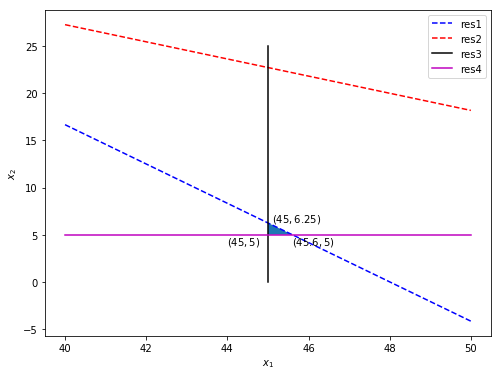

In [22]:
plt.figure(figsize = (8,6))
plt.plot(x1, res1(x1), 'b--', label = 'res1')
plt.plot(x1, res2(x1), 'r--', label = 'res2')
plt.plot([45, 45], [0, 25], 'k', label = 'res3')
plt.plot([40, 50], [5, 5], 'm', label = 'res4')
plt.fill_between(np.array([45.0, 45.6]), res1(np.array([45.0, 45.6])), 5*np.ones(2))
plt.text(44,4,'$(45,5)$',fontsize=10)
plt.text(45.1,6.35,'$(45,6.25)$',fontsize=10)
plt.text(45.6,4,'$(45.6,5)$',fontsize=10)
plt.legend(loc = 'best')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudihambre, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es \$15 en cada par de aretes y \$20 en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

**Diez minutos: quien primero lo haga, pasará a explicarlo al tablero y le subiré la nota de alguna tarea en la que no haya sacado 100. Debe salir a explicar el problema en el pizarrón.**

# Tarea (para antes de la clase del martes 7 de noviembre):

1. Llevar el ejemplo que viene en la url https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal a la forma explicada. Deben subir un notebook de jupyter con esto. Además deberán escribir las matrices como arreglos de numpy en el mismo cuaderno.
2. Para resolver problemas de optimización, utilizaremos el paquete pyomo. Este paquete no viene incluido en la instalación de anaconda y por tanto debe ser instalado. Seguir las siguientes instrucciones para instalarlo (deben subir un pantallazo de la consola una vez la instalación finalice):
 - Para Windows: primero correr el comando `conda install -c conda-forge pyomo pyomo.extras`, y luego `conda install -c cachemeorg glpk ipopt_bin`.
 - Mac o Linux: primero correr el comando `conda install -c conda-forge pyomo pyomo.extras`, y luego `conda install -c conda-forge glpk ipopt`.
3. Familiarizarse con el problema de la dieta (acá verán como funciona pyomo) https://github.com/Pyomo/PyomoGallery/tree/master/diet.

Subir lo anterior en un archivo comprimido llamado `Tarea6_ApellidoNombre`.

# Recordar: entrega de examen módulo 2 mañana miércoles 1 de noviembre antes de las 23:00.

# Presentación del proyecto en el horario de la clase del viernes. Subir el entregable el viernes antes de las 23:00 (mismas condiciones del proyecto del módulo 1: notebook, presentación y GitHub).

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>